<a href="https://colab.research.google.com/github/worldwidekatie/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [69]:
import numpy as np
import pandas as pd
import math as math

sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales

array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [73]:
#To check my work
print('sales mean')
print(sales.mean())
print('sales variance')
print(sales.var())
print('sales standard deviation')
print(sales.std())

sales mean
3052.714285714286
sales variance
183761.06122448976
sales standard deviation
428.67360686714756


In [21]:
#Sales Mean by Hand - Is Correct
mean = sum(sales)/len(sales)
mean

3052.714285714286

\begin{align}
v = \frac{\sum{(X_{i} - \overline{X})^{2}} }{N-1}
\end{align}

In [97]:
#Sales Variance by Hand

#I actually consider this correct because it doesn't match up to above
#unless I do N instead of N-1 and I want N-1.
def variance(df):
  mean = sum(df)/len(df)
  newdf = (df-mean)**2
  output = sum(newdf)/(len(df)-1)
  print(output)

v_sales = variance(sales)
v_sales


214387.90476190473


 $\sqrt(v)$

In [88]:
#Standard Deviation - Would be correct except I'm using the variance
# made with n-1.
import math as math

sales_SD = math.sqrt(214387.90476190473)
sales_SD

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [92]:
df = pd.DataFrame({'sales': [3505, 2400, 3027, 2798, 3700, 3250, 2689],
      'customers':[127, 80, 105, 92, 120, 115, 93]})
df.cov()

#The covariance is 7604.357143 

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [94]:
#To Check my Work
print('customer mean')
print(df['customers'].mean())
print('customer variance')
print(df['customers'].var())
print('customer standard deviation')
print(df['customers'].std())

customer mean
104.57142857142857
customer variance
290.95238095238096
customer standard deviation
17.057326313123664


In [98]:
#Customers Variance
c_var = variance(df['customers'])
c_var

290.95238095238096


In [102]:
#Customers Standard Deviation
cust_SD = math.sqrt(290.95238095238096)
cust_SD

17.057326313123664

First find the covariance, then find the correlation coefficient


\begin{align}
cov = \frac{\sum{(X - \overline{X})(Y - \overline{Y})}}{n-1}
\end{align}

In [108]:
#Covariance
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [43]:
#A lot of code that didn't work out
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales_mean = sum(sales)/len(sales)
sales_cov = [3505-sales_mean, 2400-sales_mean, 3027-sales_mean, 2798-sales_mean, 3700-sales_mean, 3250-sales_mean, 2689-sales_mean]
sales_cov = np.array(sales_cov)

customers = [127, 80, 105, 92, 120, 115, 93]
cust_mean = sum(customers)/len(customers)
cust_cov = customers = [127-cust_mean, 80-cust_mean, 105-cust_mean, 92-cust_mean, 120-cust_mean, 115-cust_mean, 93-cust_mean]
cust_cov = np.array(cust_cov)

num_cov = cust_cov + sales_cov
num_cov = sum(num_cov)

cov = num_cov / (len(sales)-1)
cov

-5.684341886080802e-14

If we divide our covariance values by the product of the standard deviations of the two variables, we'll end up with what's called the Correlation Coefficient. 

\begin{align}
r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}
\end{align}

In [111]:
#Checking my Work
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [110]:
r = 7604.357143 / (cust_SD*sales_SD)
r


0.962833977832979

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [49]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

df.describe()

df2 = df[['Unnamed: 0', 'pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body', 'has_cabin_number']]
df2.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [50]:
df2.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [51]:
df2.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

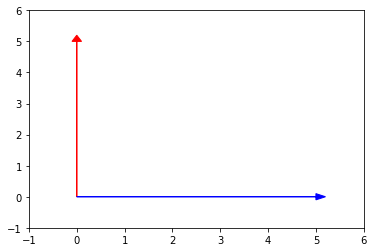

In [53]:
#Perpendicular is a synonym for orthogonal
import matplotlib.pyplot as plt

veca = [0, 5]
vecb = [5, 0]

plt.arrow(0,0, veca[0], veca[1], head_width=.2, head_length=.2, color = 'red')
plt.arrow(0,0, vecb[0], vecb[1], head_width=.2, head_length=.2, color = 'blue')
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

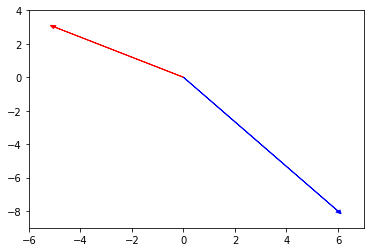

In [54]:
#a and b are not orthogonal because when you look at the graph they are
#clearly not perpendicular
veca = [-5, 3, 7]
vecb = [6, -8, 2]

plt.arrow(0,0, veca[0], veca[1], head_width=.2, head_length=.2, color = 'red')
plt.arrow(0,0, vecb[0], vecb[1], head_width=.2, head_length=.2, color = 'blue')
plt.xlim(-6, 7)
plt.ylim(-9, 4)
plt.show()

In [57]:
#And if they were orthogonal their dot product should be zero but it is -40
np.dot(veca, vecb)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [56]:
#They have in common that they seem to be the same number.
c = [2, -15, 6, 20]
c = np.array(c)

#c norm squared
c_norm = np.linalg.norm(c)
c_norm_squared = c_norm**2
print(c_norm_squared)

#c dot product c
c_dot = np.dot(c, c)
print(c_dot)

#c transposed times c
c_t = c.T
c_t_mul_c = np.matmul(c_t, c)
print(c_t_mul_c)

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 3\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 7\hat{i} + 12\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [58]:
f = [4, 12, 11, 9, 2]
f = np.array(f)

f_norm = np.linalg.norm(f)
f_uv = f/f_norm

f_uv

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

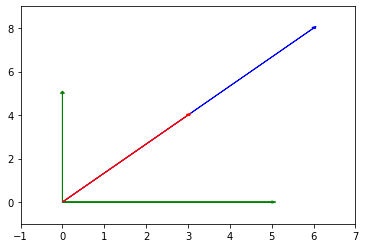

In [61]:
li1 = [0,5]
li2 = [5,0]
ld1 = [6,8]
ld2 = [3,4]

plt.arrow(0, 0, li1[0], li1[1], head_width=.1, head_length=.1, color = 'g')
plt.arrow(0, 0, li2[0], li2[1], head_width=.1, head_length=.1, color = 'g')
plt.arrow(0, 0, ld1[0], ld1[1], head_width=.1, head_length=.1, color = 'b')
plt.arrow(0, 0, ld2[0], ld2[1], head_width=.1, head_length=.1, color = 'r')
plt.xlim(-1,7)
plt.ylim(-1,9)
plt.show()

#Green = linearly independent
#Red and Blue = linearly dependent

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#I think it's like infinity on a 1D line because they're dependent
#Because g*4 = h

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [63]:
A = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

#Then find the rank of matrix A
np.linalg.matrix_rank(A)

3

In [0]:
# A rank of 3 means l, m, and n are linearly independent.
# Because of that, they can do infinity in 3D and that's the span

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



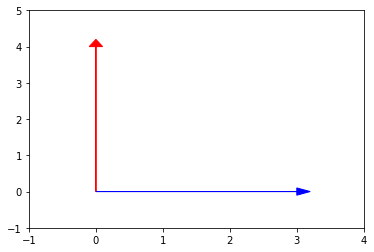

In [64]:
veca = [0, 4]
vecb = [3, 0]

plt.arrow(0,0, veca[0], veca[1], head_width=.2, head_length=.2, color = 'red')
plt.arrow(0,0, vecb[0], vecb[1], head_width=.2, head_length=.2, color = 'blue')
plt.xlim(-1, 4)
plt.ylim(-1, 5)
plt.show()

## 6.2 What does it mean to form a basis?

To be linearly independent and have a span of infinity in some number of dimensions.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [65]:
P = np.array([[1,2,3],
     [-1,0,7],
     [4,8,2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It is basically made up of three vectors that are all linearly independent and span three-dimensional space.

#**Stretch Goals** actually start here with Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

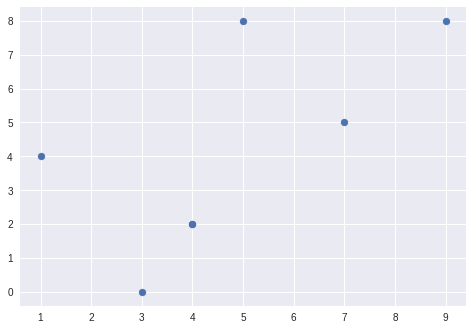

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()